In [3]:
import pandas as pd
!pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_kmo

In [4]:
df = pd.read_csv('d_data.csv')

In [6]:
df.head(3)

,PINST1,PINST2,PINST3,PINST4,PINST5,PINST6,PSOCP1,PSOCP2,PSCOP3,PSCOP4,PTRANS1,PTRANS2,PTRANS3,PMSC1,PMSC2,PMSC3,PMSC4,PMSC5,PMSC6,PMSC7
0,4,4,5,5,4,5,3,4,4,5,5,5,5,4,5,5,5,5,5,4
1,3,4,1,4,4,3,4,4,4,4,3,2,3,4,3,3,5,2,5,3
2,4,4,5,4,3,5,4,5,4,4,5,5,5,3,5,5,4,5,5,5


In [7]:
df.columns

Index(['PINST1', 'PINST2', 'PINST3', 'PINST4', 'PINST5', 'PINST6', 'PSOCP1',
       'PSOCP2', 'PSCOP3', 'PSCOP4', 'PTRANS1', 'PTRANS2', 'PTRANS3', 'PMSC1',
       'PMSC2', 'PMSC3', 'PMSC4', 'PMSC5', 'PMSC6', 'PMSC7'],
      dtype='object')

In [9]:
#variables to drop
# 'PSCOP3', 'PSCOP4', 'PMSC1', 'PINST6', 'PMSC4', 'PMSC3', 'PTRANS2'

In [12]:
mm = list(df.columns)
mm.index('PSCOP3')

8

In [13]:
mm.pop(mm.index('PSCOP3'))
mm.pop(mm.index('PSCOP4'))
mm.pop(mm.index('PMSC1'))
mm.pop(mm.index('PINST6'))
mm.pop(mm.index('PMSC4'))
mm.pop(mm.index('PMSC3'))
mm.pop(mm.index('PTRANS2'))

'PTRANS2'

In [15]:
len(mm)

13

In [17]:
dff = df[mm]

In [18]:
dff.head(2)

,PINST1,PINST2,PINST3,PINST4,PINST5,PSOCP1,PSOCP2,PTRANS1,PTRANS3,PMSC2,PMSC5,PMSC6,PMSC7
0,4,4,5,5,4,3,4,5,5,5,5,5,4
1,3,4,1,4,4,4,4,3,3,3,2,5,3


In [19]:
dff.corr()

,PINST1,PINST2,PINST3,PINST4,PINST5,PSOCP1,PSOCP2,PTRANS1,PTRANS3,PMSC2,PMSC5,PMSC6,PMSC7
PINST1,1.000000,0.338367,0.597879,0.130127,-0.447292,0.009085,0.038749,0.523431,0.203411,0.385699,0.558086,-0.222648,0.000750
PINST2,0.338367,1.000000,0.093675,-0.183986,-0.182364,0.279104,0.182385,0.158542,-0.207638,0.028404,0.169039,-0.199684,0.056782
PINST3,0.597879,0.093675,1.000000,0.352469,-0.260195,-0.040284,0.099573,0.795678,0.627130,0.745147,0.848358,-0.040852,0.245313
PINST4,0.130127,-0.183986,0.352469,1.000000,0.008422,-0.108064,-0.081556,0.236008,0.444793,0.130871,0.251634,0.101266,-0.067659
PINST5,-0.447292,-0.182364,-0.260195,0.008422,1.000000,-0.382580,-0.137468,-0.275854,-0.145927,-0.038783,-0.343067,0.490423,-0.043559
PSOCP1,0.009085,0.279104,-0.040284,-0.108064,-0.382580,1.000000,0.590841,0.016478,-0.363713,-0.116730,0.152714,-0.151093,0.101088
PSOCP2,0.038749,0.182385,0.099573,-0.081556,-0.137468,0.590841,1.000000,0.070277,-0.316529,-0.135410,0.294507,-0.188969,0.203022
PTRANS1,0.523431,0.158542,0.795678,0.236008,-0.275854,0.016478,0.070277,1.000000,0.616147,0.746309,0.937904,0.015008,0.180194
PTRANS3,0.203411,-0.207638,0.627130,0.444793,-0.145927,-0.363713,-0.316529,0.616147,1.000000,0.627555,0.550381,0.166527,0.283025
PMSC2,0.385699,0.028404,0.745147,0.130871,-0.038783,-0.116730,-0.135410,0.746309,0.627555,1.000000,0.677266,0.451997,0.503465


Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [20]:
#df.dtypes

In [26]:
chi_square_value,p_value=calculate_bartlett_sphericity(dff)
chi_square_value, p_value

(2253.8970226075203, 0.0)

In [30]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(dff)

/usr/local/lib/python3.6/dist-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [24]:
kmo_model

0.4470396596765674

In [31]:
kmo_all

array([0.66743486, 0.52950069, 0.69857324, 0.41787802, 0.48882423,
       0.48630606, 0.30871037, 0.67679396, 0.69005547, 0.56226467,
       0.63852551, 0.27703697, 0.35240687])

In [36]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(5, rotation='promax')
fa.fit(dff)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([4.56136266, 2.55937851, 1.57093923, 1.10304102, 0.86811178,
       0.66762509, 0.59161624, 0.48272733, 0.23716402, 0.17602161,
       0.13403753, 0.03221275, 0.01576223])

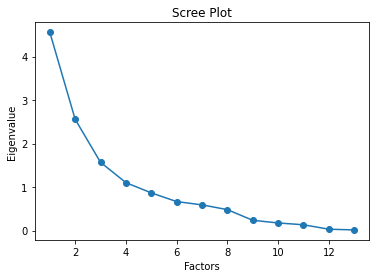

In [37]:
# Create scree plot using matplotlib
df = dff
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.savefig('screen1.png')
plt.show()

In [43]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(3, rotation='promax', method='principal')
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='principal', n_factors=3, rotation='promax',
               rotation_kwargs={}, use_smc=True)

In [44]:
fa.loadings_

array([[ 0.62272308,  0.04580241, -0.41591405],
       [ 0.10969742,  0.47829067, -0.1921321 ],
       [ 0.92461432, -0.01895357, -0.01241491],
       [ 0.36671484, -0.41278233, -0.10062212],
       [-0.32612728, -0.25614596,  0.5554428 ],
       [-0.05348225,  0.81508704, -0.02818701],
       [ 0.01996934,  0.8046345 ,  0.07465743],
       [ 0.91759646,  0.03270728,  0.0112445 ],
       [ 0.75118304, -0.45686857,  0.14095012],
       [ 0.84238299, -0.01337565,  0.48840724],
       [ 0.91527349,  0.20487366, -0.02902362],
       [ 0.0610768 , -0.11776415,  0.82133409],
       [ 0.35478413,  0.41353223,  0.66211793]])

In [45]:
fa.get_communalities()

array([0.5628664 , 0.27771023, 0.85542502, 0.31499384, 0.48048646,
       0.66802174, 0.65340919, 0.84317946, 0.79287179, 0.94832963,
       0.88054114, 0.69218846, 0.73528084])

In [47]:
fa.get_uniquenesses()

array([0.4371336 , 0.72228977, 0.14457498, 0.68500616, 0.51951354,
       0.33197826, 0.34659081, 0.15682054, 0.20712821, 0.05167037,
       0.11945886, 0.30781154, 0.26471916])

In [52]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(4, rotation='varimax', method='principal')
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='principal', n_factors=4, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [53]:
fa.loadings_

array([[ 0.66765941, -0.07274211, -0.40600862, -0.2986179 ],
       [ 0.18149523,  0.15540782, -0.19313629, -0.72819457],
       [ 0.91853335,  0.03437743, -0.03431745,  0.1093759 ],
       [ 0.30926256, -0.04211361, -0.1170678 ,  0.74086968],
       [-0.36532959, -0.28433387,  0.58332695,  0.12769181],
       [-0.03184983,  0.84857788, -0.12070058, -0.15494104],
       [ 0.02762405,  0.89018233, -0.02782825, -0.03803318],
       [ 0.91812543,  0.03916036, -0.00939717,  0.01868811],
       [ 0.71001131, -0.31772338,  0.1538339 ,  0.40133185],
       [ 0.82692609, -0.11832924,  0.48259797, -0.06618678],
       [ 0.91727472,  0.25612032, -0.07453265,  0.04520095],
       [ 0.01375638, -0.17438769,  0.82701643,  0.10408292],
       [ 0.34101543,  0.3060005 ,  0.6155061 , -0.14970914]])

In [54]:
fa.get_communalities()

array([0.70507615, 0.62466106, 0.85802609, 0.66000963, 0.57088699,
       0.75967418, 0.79540861, 0.84492539, 0.78979633, 0.93509006,
       0.91458878, 0.72538973, 0.61118841])

In [55]:
fa.get_uniquenesses()

array([0.29492385, 0.37533894, 0.14197391, 0.33999037, 0.42911301,
       0.24032582, 0.20459139, 0.15507461, 0.21020367, 0.06490994,
       0.08541122, 0.27461027, 0.38881159])

In [56]:
# Get variance of each factors
list(fa.get_factor_variance())

[array([4.54205046, 1.9318816 , 1.89765358, 1.42313578]),
 array([0.3493885 , 0.14860628, 0.14597335, 0.10947198]),
 array([0.3493885 , 0.49799477, 0.64396813, 0.75344011])]

In [60]:
ls = ['SS Loadings','Proportion Var','Cumulative Var']
vr = pd.DataFrame(ls)
vr['1'] = (list(fa.get_factor_variance())[0][0],list(fa.get_factor_variance())[1][0], list(fa.get_factor_variance())[2][0])
vr['2'] = (list(fa.get_factor_variance())[0][1],list(fa.get_factor_variance())[1][1], list(fa.get_factor_variance())[2][1])
vr['3'] = (list(fa.get_factor_variance())[0][2],list(fa.get_factor_variance())[1][2], list(fa.get_factor_variance())[2][2])
vr['4'] = (list(fa.get_factor_variance())[0][3],list(fa.get_factor_variance())[1][3], list(fa.get_factor_variance())[2][3])
vr.columns = ('properties','factor1', 'factor2', 'factor3', 'factor4')

In [61]:
vr

,properties,factor1,factor2,factor3,factor4
0,SS Loadings,4.542050,1.931882,1.897654,1.423136
1,Proportion Var,0.349388,0.148606,0.145973,0.109472
2,Cumulative Var,0.349388,0.497995,0.643968,0.753440


# NEW DATA

In [4]:
import pandas as pd

In [20]:
df = pd.read_csv('dave_final.csv')

In [21]:
df.head()

,Unnamed: 0,PINST1,PINST2,PINST3,PINST4,PSOCP1,PSOCP2,PTRANS1,PTRANS2,PTRANS3,...,PSOCP11,PSOCP22,PTRANS11,PTRANS22,PTRANS33,PMSC11,PMSC22,PMSC33,PROFITS,AGE
0,0,4,4,5,5,3,4,5,5,5,...,3,4,5,5,5,5,5,5,33,2
1,1,3,4,1,4,4,4,3,2,3,...,4,4,3,2,3,5,5,5,33,2
2,2,4,4,5,4,4,5,5,5,5,...,4,5,5,5,5,5,5,5,33,2
3,3,4,4,5,5,5,4,5,5,5,...,5,4,5,5,5,5,5,5,36,5
4,4,4,4,4,4,4,5,5,5,4,...,4,5,5,5,4,5,5,4,37,3


In [22]:
df.columns

Index(['Unnamed: 0', 'PINST1', 'PINST2', 'PINST3', 'PINST4', 'PSOCP1',
       'PSOCP2', 'PTRANS1', 'PTRANS2', 'PTRANS3', 'PMSC1', 'PMSC2', 'PMSC3',
       'PINST11', 'PINST22', 'PINST33', 'PINST44', 'PSOCP11', 'PSOCP22',
       'PTRANS11', 'PTRANS22', 'PTRANS33', 'PMSC11', 'PMSC22', 'PMSC33',
       'PROFITS', 'AGE'],
      dtype='object')

In [23]:
df2 = df[['PINST1', 'PINST2', 'PINST3', 'PINST4', 'PSOCP1',
       'PSOCP2', 'PTRANS1', 'PTRANS2', 'PTRANS3', 'PMSC1', 'PMSC2', 'PMSC3',
       'PINST11', 'PINST22', 'PINST33', 'PINST44', 'PSOCP11', 'PSOCP22',
       'PTRANS11', 'PTRANS22', 'PTRANS33', 'PMSC11', 'PMSC22', 'PMSC33']]

In [24]:
dfcorr = df2.corr()

In [25]:
dfcorr

,PINST1,PINST2,PINST3,PINST4,PSOCP1,PSOCP2,PTRANS1,PTRANS2,PTRANS3,PMSC1,...,PINST33,PINST44,PSOCP11,PSOCP22,PTRANS11,PTRANS22,PTRANS33,PMSC11,PMSC22,PMSC33
PINST1,1.000000,0.338367,0.597879,0.130127,0.009085,0.038749,0.523431,0.558086,0.203411,-0.447292,...,0.188046,0.045845,-0.014824,-0.126548,0.292084,0.260065,0.069011,0.259626,0.204797,0.016497
PINST2,0.338367,1.000000,0.093675,-0.183986,0.279104,0.182385,0.158542,0.169039,-0.207638,-0.182364,...,0.090106,-0.067481,0.045544,-0.087468,0.156210,0.109544,-0.020753,0.150908,0.093926,-0.053798
PINST3,0.597879,0.093675,1.000000,0.352469,-0.040284,0.099573,0.795678,0.848358,0.627130,-0.260195,...,0.428826,0.328108,-0.020633,0.128541,0.489868,0.518169,0.368217,0.443132,0.446122,0.289642
PINST4,0.130127,-0.183986,0.352469,1.000000,-0.108064,-0.081556,0.236008,0.251634,0.444793,0.008422,...,0.114290,0.310775,-0.219241,-0.077720,0.128540,0.146407,0.340181,0.111073,0.121218,0.312444
PSOCP1,0.009085,0.279104,-0.040284,-0.108064,1.000000,0.590841,0.016478,0.152714,-0.363713,-0.382580,...,0.134471,-0.143608,0.299065,0.286667,0.047458,0.116435,-0.190597,0.049781,0.127041,-0.177345
PSOCP2,0.038749,0.182385,0.099573,-0.081556,0.590841,1.000000,0.070277,0.294507,-0.316529,-0.137468,...,0.091726,-0.225169,0.129882,0.491485,-0.082940,0.020518,-0.270116,-0.057753,0.070217,-0.232630
PTRANS1,0.523431,0.158542,0.795678,0.236008,0.016478,0.070277,1.000000,0.937904,0.616147,-0.275854,...,0.430774,0.318489,0.032322,0.107597,0.511022,0.485419,0.372048,0.486209,0.438351,0.303481
PTRANS2,0.558086,0.169039,0.848358,0.251634,0.152714,0.294507,0.937904,1.000000,0.550381,-0.343067,...,0.454872,0.242080,0.051355,0.240688,0.481648,0.513844,0.286711,0.449372,0.463228,0.216554
PTRANS3,0.203411,-0.207638,0.627130,0.444793,-0.363713,-0.316529,0.616147,0.550381,1.000000,-0.145927,...,0.277265,0.549416,-0.113693,-0.044681,0.360901,0.359158,0.645435,0.320734,0.295182,0.564010
PMSC1,-0.447292,-0.182364,-0.260195,0.008422,-0.382580,-0.137468,-0.275854,-0.343067,-0.145927,1.000000,...,-0.073323,0.118323,-0.227144,-0.109695,-0.029467,-0.091088,0.112274,-0.015032,-0.076975,0.129382


In [26]:
chi_square_value,p_value=calculate_bartlett_sphericity(df2)
chi_square_value, p_value

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/factor_analyzer/factor_analyzer.py:118: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(nan, nan)

In [27]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df2)
kmo_model

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.7391631683314126

In [28]:
# Create factor analysis object and perform factor analysis
dff = df2
fa = FactorAnalyzer(5, rotation='promax')
fa.fit(dff)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([ 8.72190203e+00,  4.06262194e+00,  2.62091143e+00,  1.74505581e+00,
        1.24234706e+00,  1.19858523e+00,  8.63434743e-01,  6.86667772e-01,
        5.93625558e-01,  4.32999693e-01,  3.96032279e-01,  2.98789469e-01,
        2.82808855e-01,  1.98255947e-01,  1.60635009e-01,  1.22634405e-01,
        1.08604413e-01,  9.27735525e-02,  5.94730758e-02,  4.59230351e-02,
        2.93081184e-02,  2.52887963e-02,  1.13217813e-02, -4.52069461e-15])

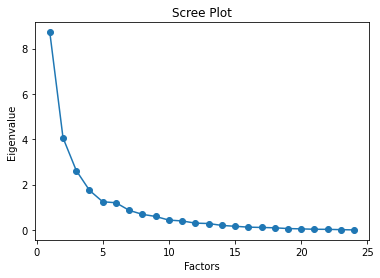

In [29]:
# Create scree plot using matplotlib
df = dff
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.savefig('screen1.png')
plt.show()

In [30]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(3, rotation='promax', method='principal')
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='principal', n_factors=3, rotation='promax',
        rotation_kwargs={}, use_smc=True)